# **1. Import Libraries**

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# **2. Import Dataset**

In [3]:
#load data
df = pd.read_csv('/content/sample_data/glass-2.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# **Data Description:**
RI : refractive index

Na : Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg : Magnesium

AI : Aluminum

Si : Silicon

K : Potassium

Ca : Calcium

Ba : Barium

Fe : Iron

Type : Type of glass : (class attribute)



*   1 -- building_windows_float_processed
*   2 -- building_windows_non_float_processed
*   3 -- vehicle_windows_float_processed
*   4 -- vehicle_windows_non_float_processed (none in this database)
*   5 -- containers
*   6 -- tableware
*   7 -- headlamps




## **3. Data Understanding**

In [ ]:
df.shape

(214, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### We could see that there are no null values in our dataset

In [4]:
df[df.duplicated()].shape

(1, 10)

In [5]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


### There is one duplicate row, we will delete the duplicate row

In [6]:
df.drop_duplicates(inplace=True)

In [ ]:
# Print dataset info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,213.0,1.518348,0.003033,1.51115,1.51652,1.51768,1.51915,1.53393
Na,213.0,13.404085,0.816662,10.73000,12.90000,13.30000,13.81000,17.38000
Mg,213.0,2.679202,1.443691,0.00000,2.09000,3.48000,3.60000,4.49000
Al,213.0,1.449484,0.495925,0.29000,1.19000,1.36000,1.63000,3.50000
Si,213.0,72.655070,0.773998,69.81000,72.28000,72.79000,73.09000,75.41000
K,213.0,0.498873,0.653185,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,213.0,8.954085,1.425882,5.43000,8.24000,8.60000,9.15000,16.19000
Ba,213.0,0.175869,0.498245,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,213.0,0.057277,0.097589,0.00000,0.00000,0.00000,0.10000,0.51000
Type,213.0,2.788732,2.105130,1.00000,1.00000,2.00000,3.00000,7.00000


*  We could see there is a lot of difference between 50% (percentile) value and the max value for K(Potassium) and Ca(Calcium). So there is a chance of having an outlier in these 2 columns. We will further check using boxplots

*  We can see the min,max and standard deviations including 25,50 and 75 percentile values

## Understanding the target variable

###Our main objective is to classify the type of glass based on weight percentage. We have a column Type which has the values from 1 to 7 which is to determine the glass type

In [ ]:
df["Type"].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
# Checking how many types of glass are present in dataset
df['Type'].value_counts().sort_index(ascending=True)


1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

* ### We can see the most frequent type of glasses are type 2 and type 1 in our data with the maximum value of 76 and 69. We can see the value counts of all the types.

* ### The data is imbalanced. The sets of data in which classes are not evenly distributed are called imbalanced datasets.The imbalance dataset can cause high/low accuracy value of the model due to a certain class.

<Axes: xlabel='Type', ylabel='count'>

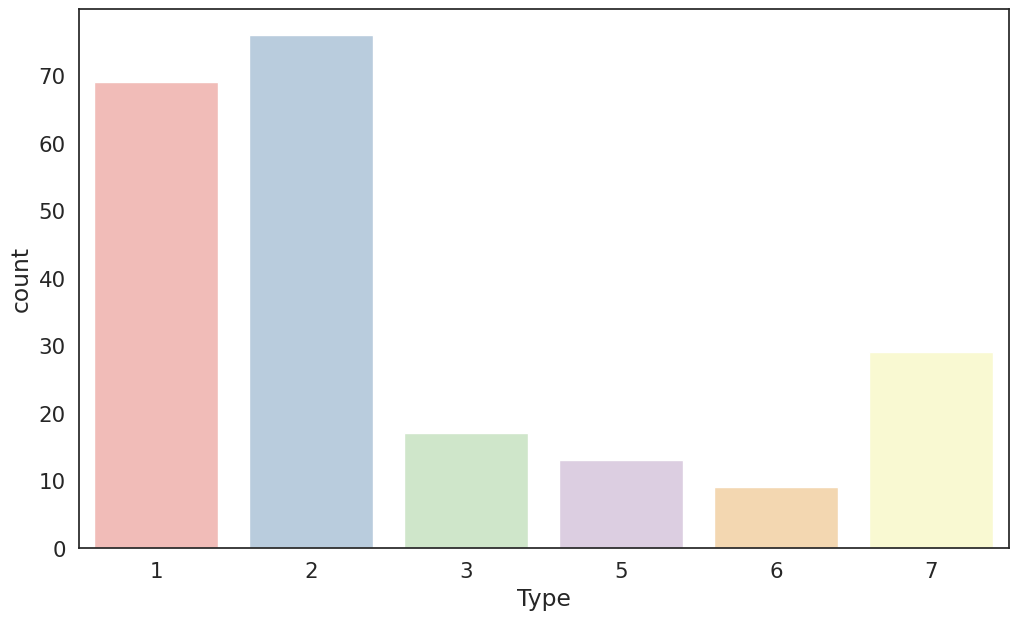

In [69]:
sns.set(style = 'white', font_scale = 1.4)
plt.subplots(figsize = (12,7))
sns.countplot(x = 'Type', data = df, palette = 'Pastel1')

# **4. Exploratary Data Analysis**

## Outliers Detection

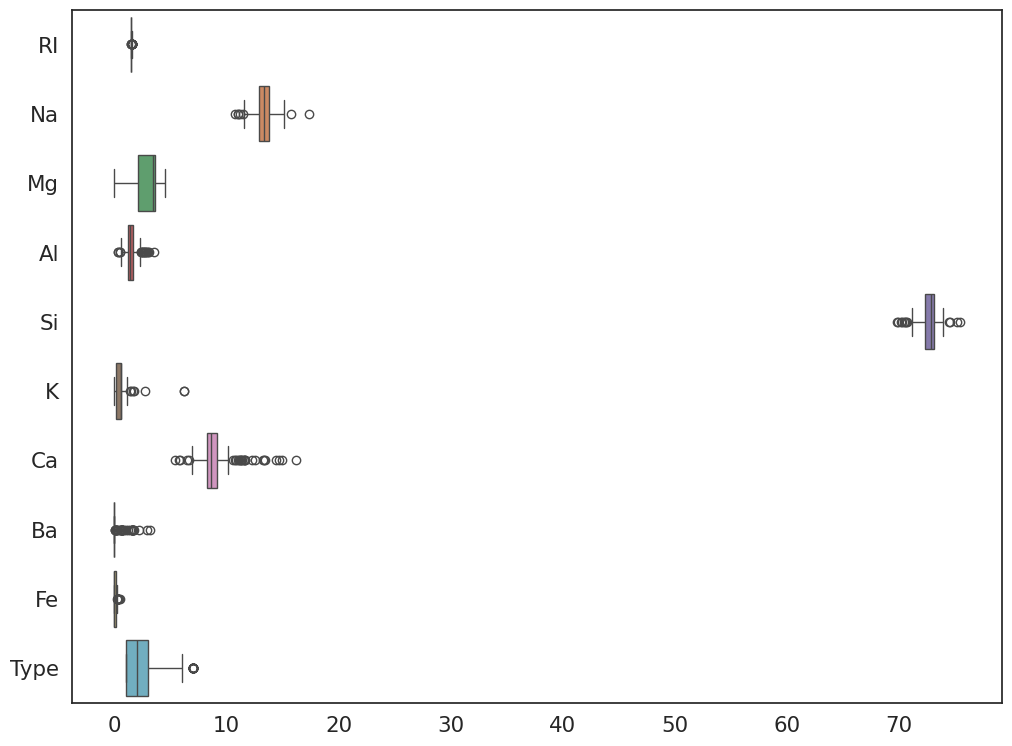

In [70]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df, orient="h");

### Unsurprisingly, Silicon has a mean that is much superior to the other constituents as we already saw in the previous section. Well, that is normal since glass is mainly based on silica.

* ### We can see there are outliers in all the columns except Mg. The Type column is also having outlier as we already saw the value counts are very less for type 7.

* ### The median line for Mg and K is towards the upper quartile which means the data is skewed.


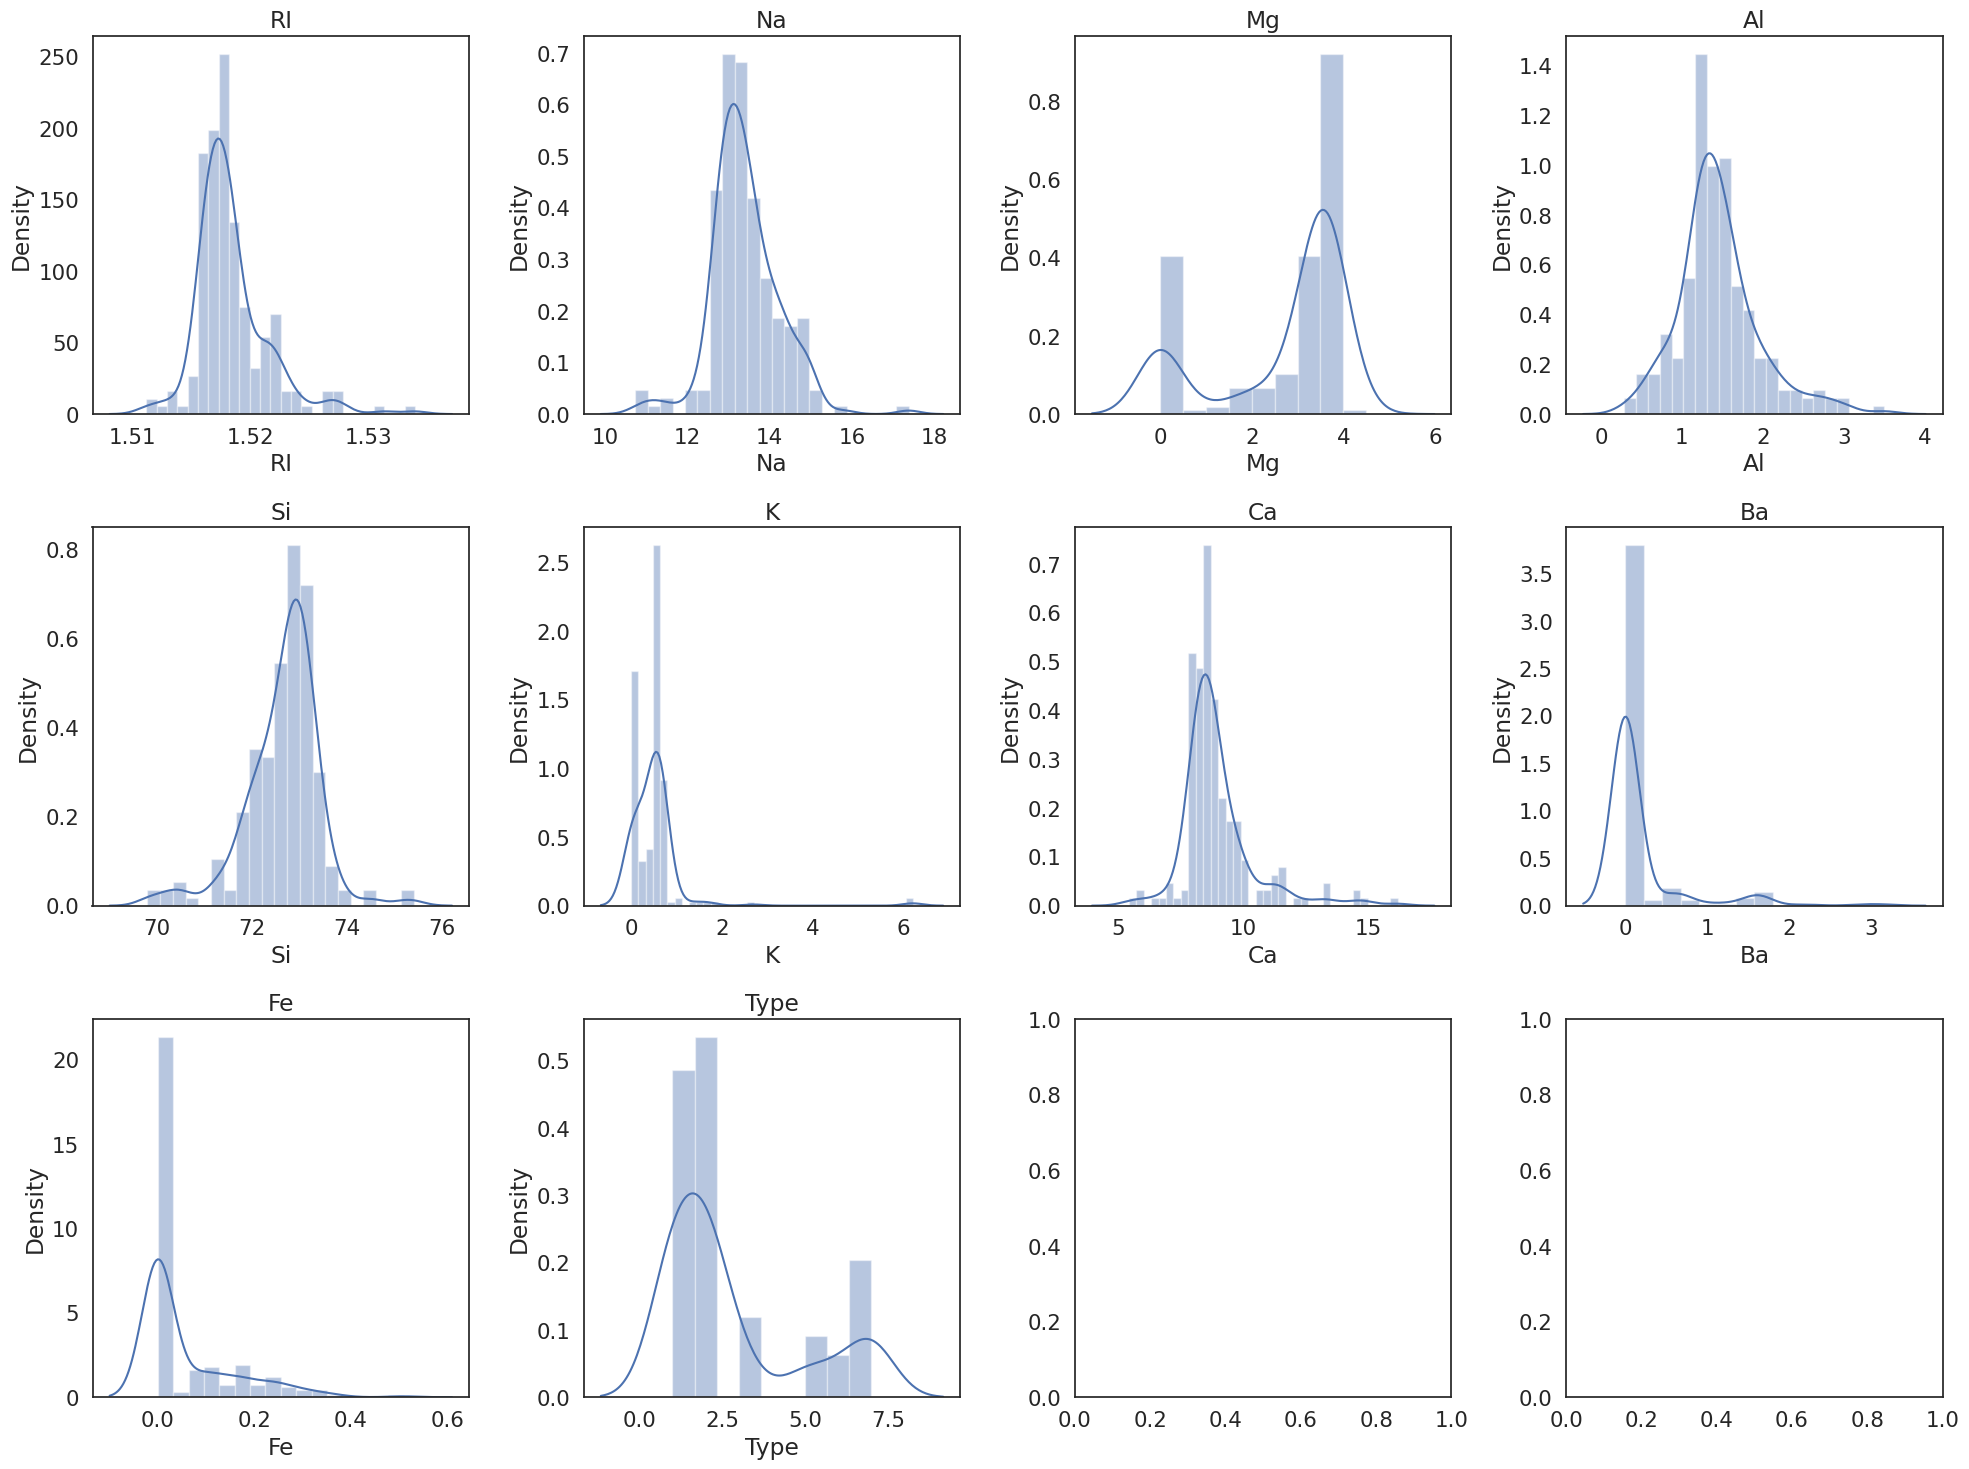

In [ ]:
# Create subplots for individual features
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each feature column
for i, column in enumerate(df.columns):
    sns.distplot(df[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.tight_layout()
plt.show()

* ### There is very high positive skewness in RI, Na, Al, K, Ca, Ba, Fe and Type.

* ### There is negative skewness in Mg and S.

## **Multivariate Analysis**

In [ ]:
# Check the correlation.

#The closer the value is to 1 (or -1), the stronger a relationship.
#The closer a number is to 0, the weaker the relationship

df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


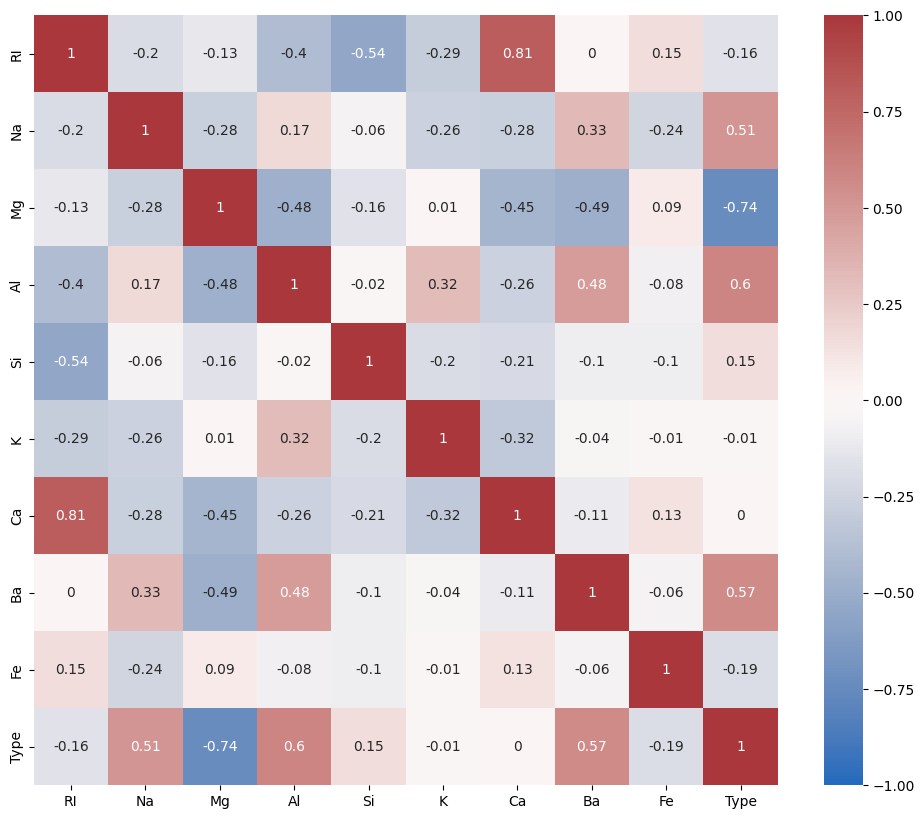

In [ ]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
matrix = df.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()



### We can notice that Ca and K values don't affect Type that much.

### Also Ca and RI are highly correlated. Thought if we delete any of them a lot of data will be missed. So, we are keeping all the same.



# **5. Data Pre-Processing**

#  **Feature Scaling**

### Scaling is necessary for distance-based algorithms such as KNN. This is to avoid higher weightage being assigned to data with a higher magnitude.

### Using standard scaler we can scale down to unit variance.

### **Formula:**

### z = (x - u) / s

### where x -> value, u -> mean, s -> standard deviation

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler()

In [9]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [10]:
#perform transformation
scaled_features = scaler.transform(df.drop('Type',axis=1))
scaled_features

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301


#**5.3 Test Train Split**

In [12]:
#Separate out features and dependent variable.
#X = df_knn
X = df_feat
y=df['Type']

In [ ]:
X.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
5,-0.789119,-0.753716,0.646254,0.344645,0.407845,0.216568,-0.621487,-0.353808,2.082200
6,-0.303303,-0.127751,0.639311,-0.625523,0.563250,0.124494,-0.551190,-0.353808,-0.588301
7,-0.260340,-0.311858,0.646254,-0.807430,0.757505,0.109149,-0.501982,-0.353808,-0.588301
8,0.275049,0.780510,0.625425,-0.160651,-0.744737,0.093803,-0.459803,-0.353808,-0.588301
9,-0.263645,-0.495966,0.639311,-0.180863,0.433746,0.109149,-0.389506,-0.353808,0.541526


In [ ]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Type, dtype: int64

In [13]:
#Split the dataset into test and train   #train_data,test_data,train_label,test_label
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (149, 9)
Shape of X_test  :  (64, 9)
Shape of y_train :  (149,)
Shape of y_test  :  (64,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.765625

## Since the testing accuracy is at 76.5%, checking the optimal k nearest neighbors would be a better first option to improvise the model's accuracy

##Initializing the variable neighbors(k),values ranging from 1-25 and two numpy zero matrices namely train_accuracy and test_accuracy each for training and testing accuracy.

optimal value of k without cross validation

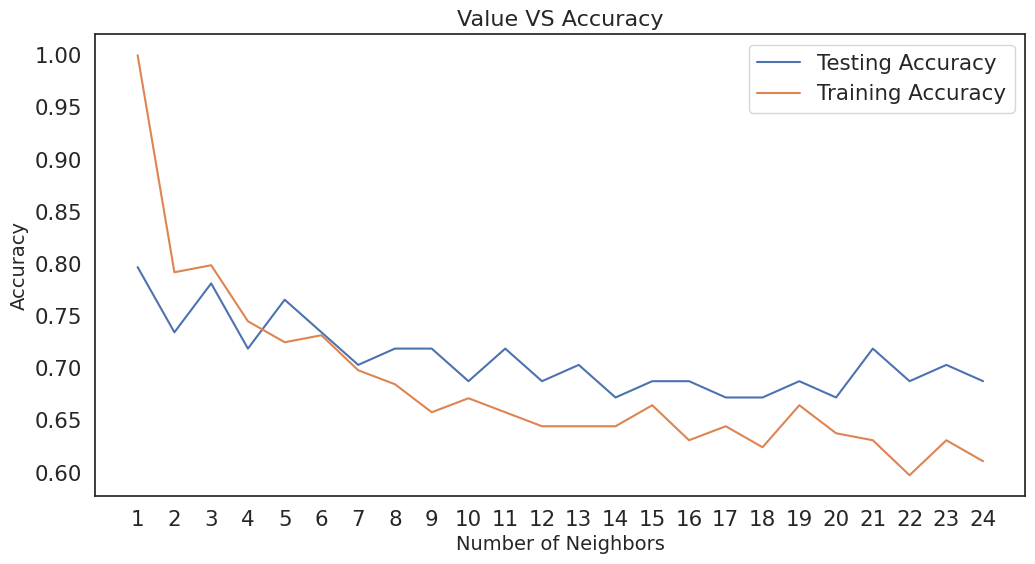

Optimal value of k: 1


In [78]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(1,25)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

plt.figure(figsize=[12,6])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy', fontsize = 16)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.xticks(k_range)
plt.show()

# Find the optimal value of k with the highest testing accuracy
optimal_k = k_range[np.argmax(test_accuracy)]
print("Optimal value of k:", optimal_k)

 Looking at the graph, it looks like there are more than one n_neighbor(k) values which improves the training accuracy and testing accuracy. But to choose the best one, implementing GridSearch Algorithm Tuning would help us better decide which could be the optimal parameters.


In the beginning, when the n_neighbors  training accuracy was a lot higher than test accuracy. So, the model was suffering from high overfitting.

After that training and test accuracy became closer. That is the sweet spot. We want that.
But when n_neighbors was going even higher, both training and test set accuracy was going down. We do not need that.

From the graph above, the perfect n_neighbors for this particular dataset and model should be 3.
When n_neighbors is about 3, both training and testing accuracy was above 75%.

# **Grid Search for Algorithm Tuning**

In [18]:
n_neighbors = np.array(range(1,25))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'n_neighbors': 1}


### After applying GridSearch, we got the best K (n_neighbors) value as 1, so we will be using the k= 1 for KNN Classifier algorithm

# **KNN Model**

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=1


[[17  1  5  0  0  0]
 [ 1 20  0  0  1  0]
 [ 1  3  3  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  7]]


              precision    recall  f1-score   support

           1       0.89      0.74      0.81        23
           2       0.80      0.91      0.85        22
           3       0.38      0.43      0.40         7
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       1.00      0.88      0.93         8

    accuracy                           0.80        64
   macro avg       0.79      0.83      0.80        64
weighted avg       0.81      0.80      0.80        64



### We can see that the accuracy score which we have got for our model is 0.80 which is 80%. It is decent accuracy score. But the accuracy score can be misleading for imbalanced data. So we use confusion matrix and classification report metrics.

* ### The precison,recall and f1 score for type 3 is very low. Since the data is imbalanced, we can see the precision,recall values are affected.

* ### We will use oversamping technique as the data is very less and undersampling will cause data loss.

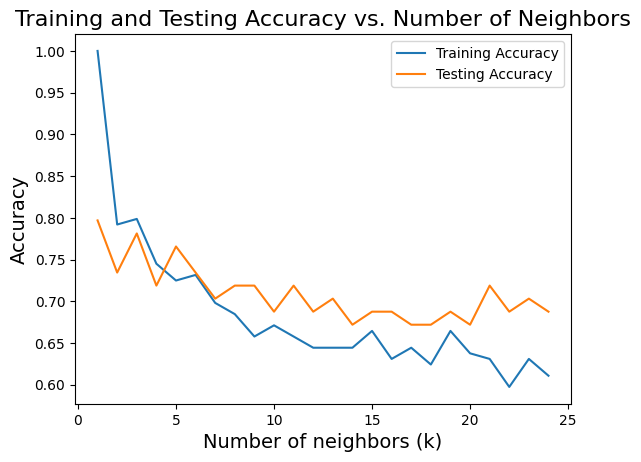

In [22]:
# Fit KNN model for optimal k and plot training/testing accuracy
train_accuracy = []
test_accuracy = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(range(1, 25), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 25), test_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy vs. Number of Neighbors', fontsize=16)
plt.xlabel('Number of neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.show()

# **Using Over Sampling for balancing the data**

### We will use SMOTE over sampling technique for oversampling the data

In [23]:
import imblearn
from imblearn.over_sampling import SMOTE

In [24]:
sm = SMOTE(sampling_strategy = 'not majority', random_state = 1)

In [25]:
x_resample, y_resample = sm.fit_resample(X, y)
y_df = pd.DataFrame(y_resample)

In [26]:
y_df.value_counts()

Type
1       76
2       76
3       76
5       76
6       76
7       76
dtype: int64

We could see the data is resampled now and all the type values are 76 now. Previously type 1 and type 2 were having values 69 and 76 respectively, and other counts were very low. We will split the resampled data into training and test data and build a KNN mode

In [27]:
#Split the dataset into test and train with resample
X_train, X_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = .3, random_state = 1, stratify = y_resample)


## **Using GridSearch for Algorithm Tuning after resampling**

In [28]:
n_neighbors = np.array(range(1,25))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'n_neighbors': 1}


After applying GridSearch, we got the best K (n_neighbors) value as 1, so we will be using the k= 1 for KNN Classifier algorithm

## **Visualizing the CV results after resampling**

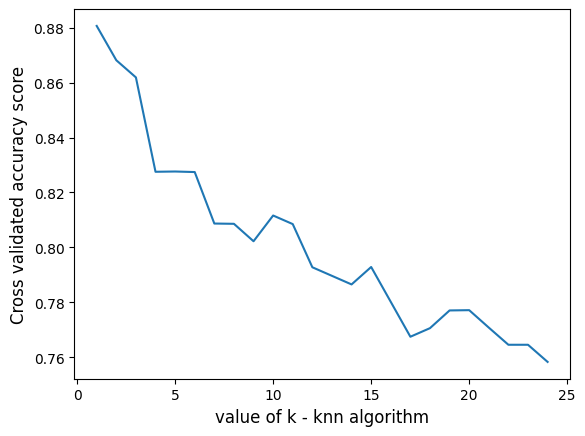

Optimal value of k: 1


In [29]:
# choose k between 1 to 25
k_range = range(1,25)
# store scores of KNN model by K=1 to 25
k_scores = []

# use iteration to caclulator different k in models, then return
#the average accuracy based on the cross validation.
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,X_train, y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm', fontsize=12)
plt.ylabel('Cross validated accuracy score', fontsize=12)
plt.show()

# Find the optimal value of k with the highest accuracy
optimal_k = k_range[np.argmax(k_scores)]
print("Optimal value of k:", optimal_k)

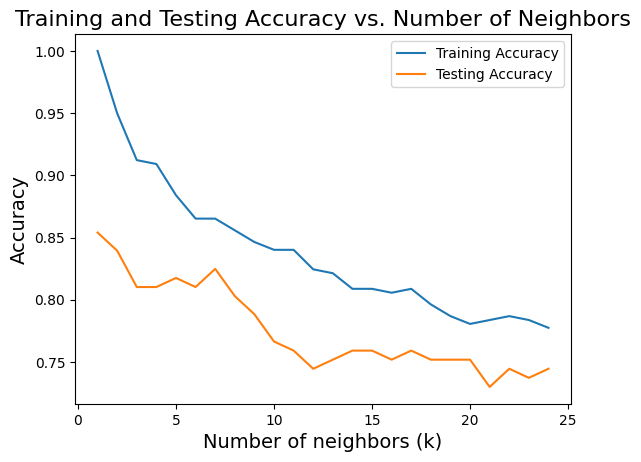

In [30]:
# Fit KNN model for optimal k and plot training/testing accuracy
train_accuracy = []
test_accuracy = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(range(1, 25), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 25), test_accuracy, label='Testing Accuracy')
plt.title('Training and Testing Accuracy vs. Number of Neighbors', fontsize=16)
plt.xlabel('Number of neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend()
plt.show()

Here, we see the accuracy is good enough to work with.

# **KNN Model after resampling**

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=1


[[16  4  3  0  0  0]
 [ 5 12  5  1  0  0]
 [ 1  1 20  0  0  0]
 [ 0  0  0 23  0  0]
 [ 0  0  0  0 23  0]
 [ 0  0  0  0  0 23]]


              precision    recall  f1-score   support

           1       0.73      0.70      0.71        23
           2       0.71      0.52      0.60        23
           3       0.71      0.91      0.80        22
           5       0.96      1.00      0.98        23
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        23

    accuracy                           0.85       137
   macro avg       0.85      0.85      0.85       137
weighted avg       0.85      0.85      0.85       137



### The accuracy is 0.85 which is 85% after applying sampling.

### We could see the precision and recall values are more than 0.70 for all the 7 types which is very decent score.

#  Conclusion :

*  # The duplicated values were removed from the dataset.
*  # Standard Scaler was used to scaled on the train and test data.
*  # Resampling was done as the data was imbalanced.
*  # Grid Serach was used to find the optimal k value for the KNN algorithm. The accuracy of KNN models was greater where K =1

*  # Overall 85% accuracy was achieved.